# Clusterización de segmentation data

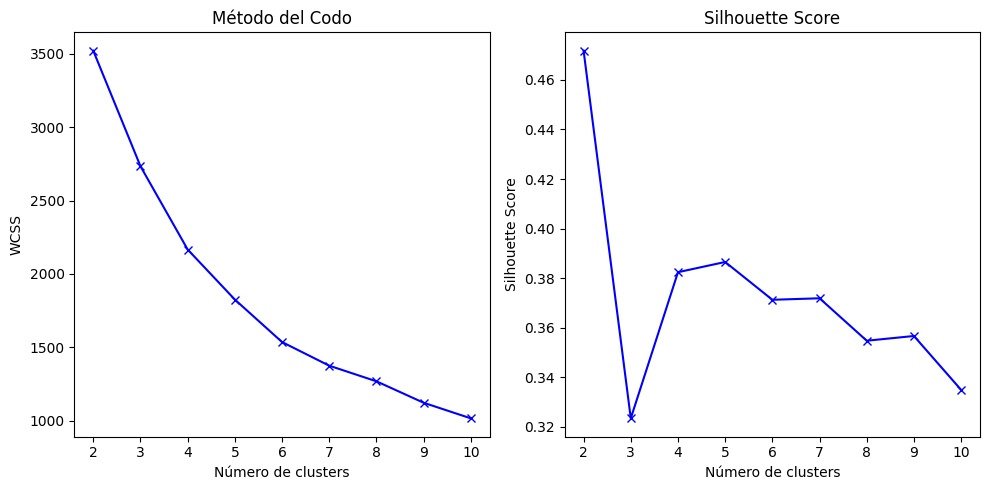

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar los datos
data = pd.read_csv('/content/sample_data/segmentation data.csv')

# Seleccionar variables relevantes para clustering (excluyendo ID)
# Podemos usar todas o seleccionar algunas como edad, ingresos, educación
X = data[['Age', 'Income', 'Education']]  # Puedes ajustar estas variables

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo para determinar número óptimo de clusters
wcss = []
silhouette_scores = []
range_values = range(2, 11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    if i > 1:  # Silhouette score no funciona con 1 cluster
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Graficar el método del codo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range_values, wcss, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo')

# Graficar silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.tight_layout()
plt.show()

                  ID       Sex  Marital status        Age  Education  \
Labels                                                                 
0       1.000012e+08  0.666667        0.723204  29.444052   1.000000   
1       1.000007e+08  0.352113        0.507042  53.211268   1.816901   
2       1.000009e+08  0.589744        0.710623  53.901099   2.117216   
3       1.000009e+08  0.118081        0.000000  27.372694   0.000000   
4       1.000009e+08  0.242537        0.277985  39.009328   0.970149   

               Income  Occupation  Settlement size  
Labels                                              
0        98522.281508    0.584217         0.452297  
1       229481.661972    1.788732         1.380282  
2       129305.168498    0.732601         0.794872  
3       108636.933579    0.726937         0.763838  
4       144084.520522    1.121269         1.067164  


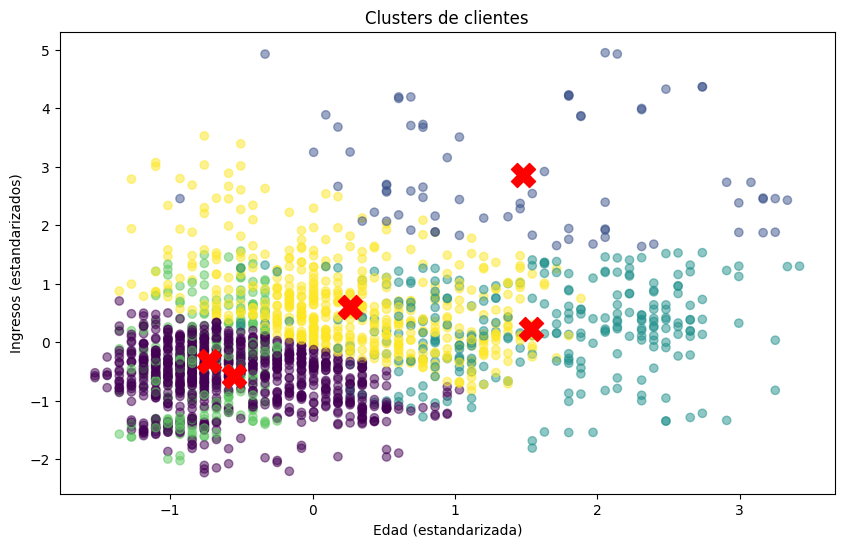

In [6]:

# Número óptimo de clusters (reemplaza con el número que hayas determinado)
optimal_clusters = 5

# Aplicar K-Means con el número óptimo
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clusters al dataframe original
data['Labels'] = clusters

# Analizar los clusters
cluster_analysis = data.groupby('Labels').mean()
print(cluster_analysis)

# Visualización (para 2-3 variables)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X')
plt.xlabel('Edad (estandarizada)')
plt.ylabel('Ingresos (estandarizados)')
plt.title('Clusters de clientes')
plt.show()

In [7]:
data.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size', 'Labels'],
      dtype='object')

/tmp/ipython-input-8-206100389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Labels', y='Income', data=X_labels, ax=ax, palette=sns.color_palette('hls', num_clusteres))
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/l

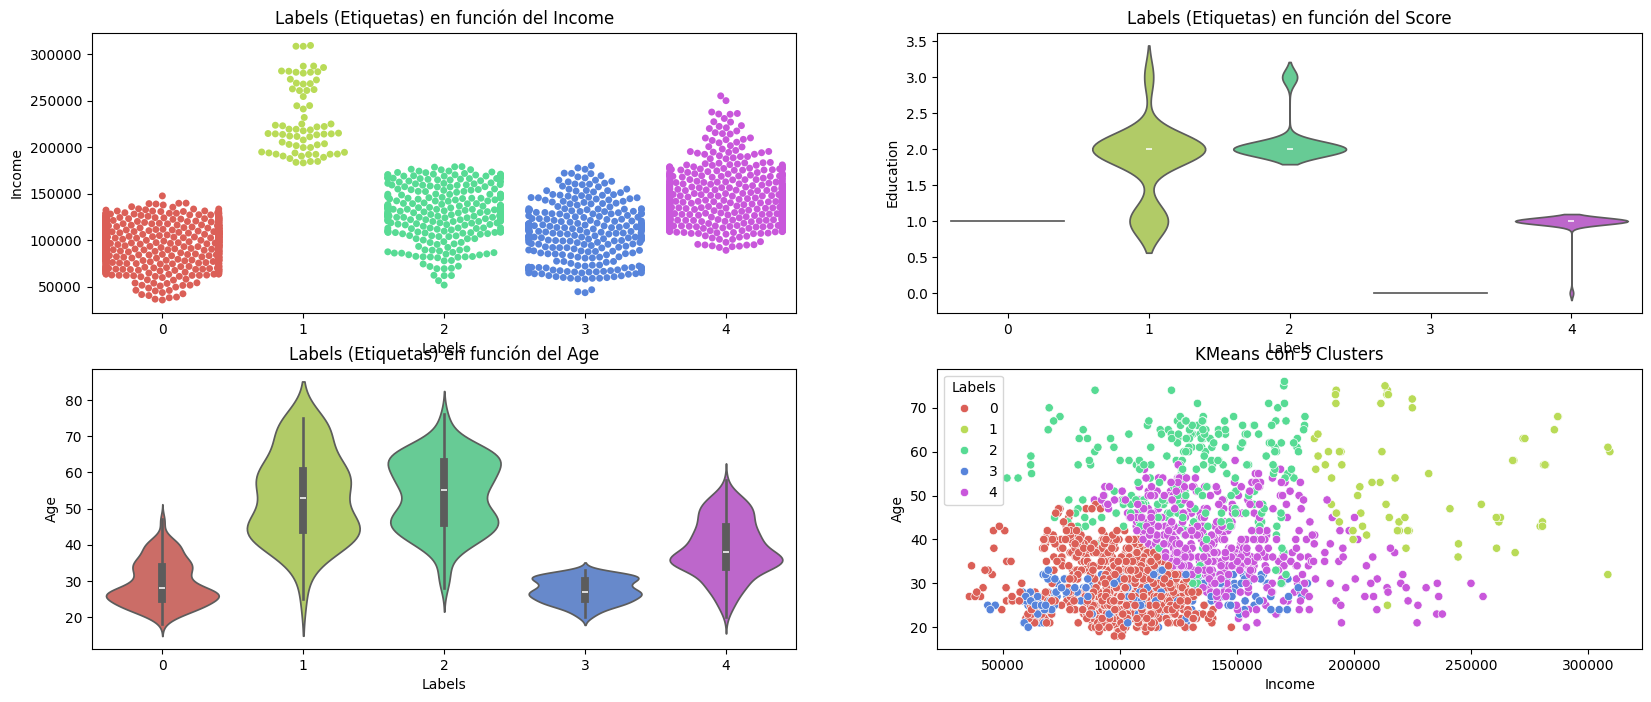

In [8]:
import seaborn as sns

def grafica_conjunta(X_labels, num_clusteres):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(221)
    sns.swarmplot(x='Labels', y='Income', data=X_labels, ax=ax, palette=sns.color_palette('hls', num_clusteres))
    ax.set_title('Labels (Etiquetas) en función del Income')

    ax = fig.add_subplot(222)
    sns.violinplot(x='Labels', y='Education', data=X_labels, ax=ax, palette=sns.color_palette('hls', num_clusteres))
    ax.set_title('Labels (Etiquetas) en función del Score')

    ax = fig.add_subplot(223)
    sns.violinplot(x='Labels', y='Age', data=X_labels, ax=ax, palette=sns.color_palette('hls', num_clusteres))
    ax.set_title('Labels (Etiquetas) en función del Age')

    # Gráfico
    ax = fig.add_subplot(224)
    sns.scatterplot(x=X_labels['Income'], y=X_labels['Age'], hue=X_labels['Labels'], palette=sns.color_palette('hls', num_clusteres))
    ax.set_title(f'KMeans con {num_clusteres} Clusters')

    plt.show()

grafica_conjunta(data, num_clusteres=5)